### Please note

#### I have written all parahraphs at the end. I believe it had more flow this way. I placed the first and second part parahraphs in subsections "Graphs" and "Statistics". The Discussion summary also has a paragraph for itself under "Summary". 

In [1]:
# importing essential modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline


In [2]:
# read and visualise the dataframe

df = pd.read_excel('Dataset.xlsx', delimiter = ',')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,* Does drug reduce cholersterol in patients wi...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Group,Cholersterol (mmol/l),NaN,NaN,NaN,NaN,NaN
2,NaN,1,6,NaN,NaN,Value Labels,NaN,NaN
3,NaN,1,6.4,NaN,NaN,Variable Value Label,NaN,NaN
4,NaN,1,7,NaN,NaN,════════════════════════════,NaN,NaN


In [3]:
# reshaping and cleaning the data

df = df.drop(columns = ['Unnamed: 0']) # get rid of the unnecessary columns 
df = df.drop(columns = ['Unnamed: 3'])
df = df.drop(columns = ['Unnamed: 4'])
df = df.drop(columns = ['Unnamed: 5'])
df = df.drop(columns = ['Unnamed: 6'])
df = df.drop(columns = ['Unnamed: 7'])

df['Unnamed: 1'] = df['Unnamed: 1'][2:24] # remove all unnecessary cells 
df['Unnamed: 2'] = df['Unnamed: 2'][2:24]

df.columns = ['Groups', 'Cholesterol (mmol/l)'] # rename accordingly 

df = df.dropna() # eliminate all nans automatically 

In [22]:
df 

,Groups,Cholesterol (mmol/l)
2,1,6
3,1,6.4
4,1,7
5,1,5.8
6,1,6
7,1,5.8
8,1,5.9
9,1,6.7
10,1,6.1
11,1,6.5


Text(0.5, 1.0, 'Cholesterol distribution across the whole population')

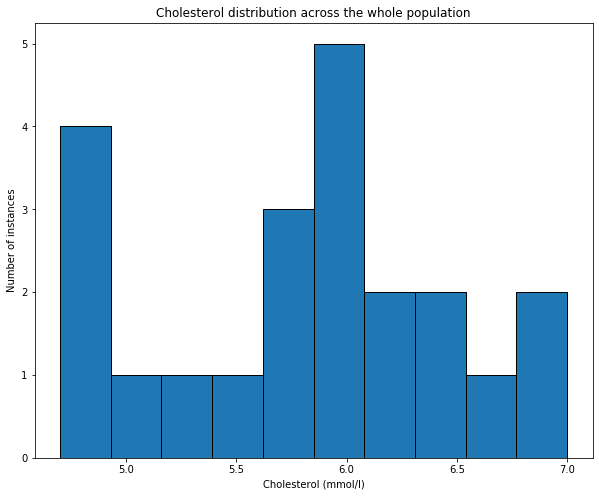

In [4]:
# Visualise the distribution

plt.figure(figsize = (10, 8))
plt.hist(df['Cholesterol (mmol/l)'], edgecolor = 'black', bins = 10)
plt.xlabel('Cholesterol (mmol/l)')
plt.ylabel('Number of instances')
plt.title('Cholesterol distribution across the whole population')

The data seems fairly normally distributed. This will be tested statistically a bit later. 

In [5]:
# Set the stage for comparisons. 
g1 = df['Cholesterol (mmol/l)'][0:11]
g2 = df['Cholesterol (mmol/l)'][11:23]

Text(0.5, 1.0, 'Plot showing the difference in trends of the two groups')

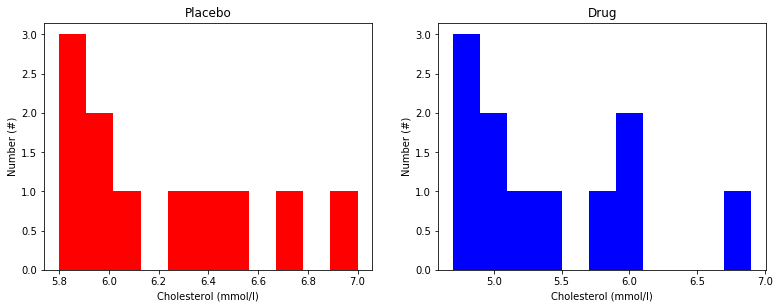

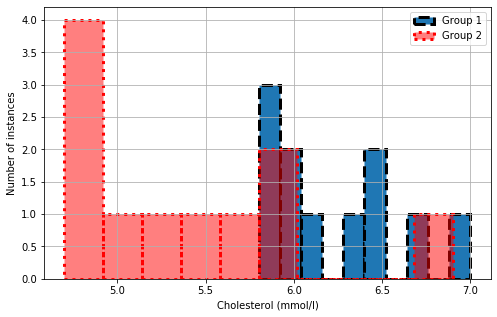

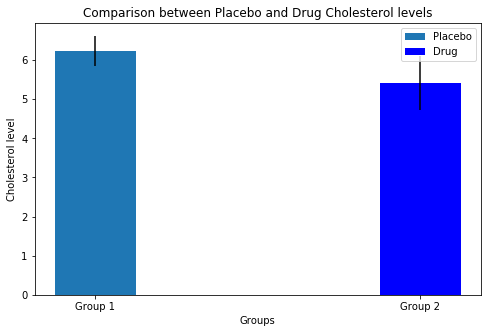

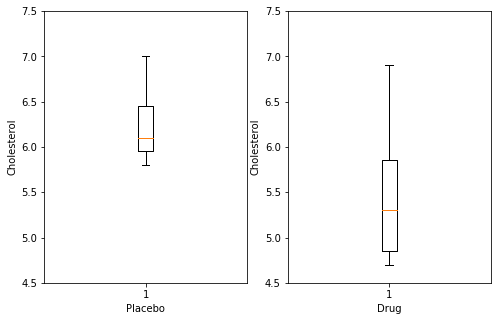

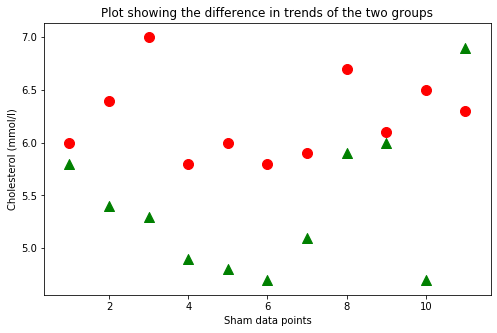

In [21]:
# Different visual comparisons between the two groups (same story, different delivery)

# Make the plots of the two groups side by side 
plt.figure (figsize=(20,10)) 
plt.subplot(231)
plt.hist(g1, 11, color = 'red')
plt.ylabel('Number (#)')
plt.xlabel('Cholesterol (mmol/l)')
plt.title('Placebo')

plt.subplot(232)
plt.hist(g2, 11, color = 'blue')
plt.ylabel('Number (#)')
plt.xlabel('Cholesterol (mmol/l)')
plt.title('Drug')

# Overlap them

plt.figure(figsize = (8, 5))
df['Cholesterol (mmol/l)'][df['Groups'] == 1].hist(bins = 10, edgecolor = 'black', ls = 'dashed', lw = 3)
df['Cholesterol (mmol/l)'][df['Groups'] == 2].hist(bins = 10, edgecolor = 'red', ls = 'dotted', lw = 3, fc = (1, 0, 0, 0.5))
plt.xlabel ('Cholesterol (mmol/l)')
plt.legend (['Group 1', 'Group 2'])
plt.ylabel ('Number of instances')

# Visualising the differences, and their standard deviations

plt.figure(figsize = (8, 5))
plt.bar([1], g1.mean(), yerr = g1.std(), width = 0.25, align = "center")
plt.bar([2], g2.mean(), yerr = g2.std(), width = 0.25, align = "center", color = "blue")
plt.xlabel('Groups')
plt.ylabel('Cholesterol level')
plt.xticks([1, 2], ['Group 1', 'Group 2'])
plt.legend(['Placebo','Drug'])
plt.title('Comparison between Placebo and Drug Cholesterol levels')


plt.figure(figsize=(8, 5))
plt.subplot(121)
plt.boxplot(g1)
plt.ylabel('Cholesterol')
plt.xlabel('Placebo')
plt.axis([0, 2, 4.5, 7.5])
plt.subplot(122)
plt.boxplot(g2)
plt.xlabel('Drug')
plt.ylabel('Cholesterol')
plt.axis([0, 2, 4.5, 7.5])


x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.figure(figsize = (8, 5))
plt.scatter(x, g1, s = 100, c = 'red')
plt.scatter(x, g2, s = 100, c = 'green', marker = '^')
plt.ylabel('Cholesterol (mmol/l)')
plt.xlabel('Sham data points')
plt.title('Plot showing the difference in trends of the two groups')

In [7]:
# Importing necessary modules for statistical analysis
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import wilcoxon as wcx

# Not the most appealing abbreviations, but they do the job. 

In [8]:
# Descriptive statistics. Median reported utilised because n < 30 

print ('Group 1 (Placebo) mean is: ' + str(g1.mean()))
print ('Group 2 (Drug) mean is: ' + str(g2.mean()))
print ('Group 1 (Placebo) standard deviation is: ' + str(g1.std()))
print ('Group 2 (Drug) standard deviation is: ' + str(g2.std()))
print ('Group 1 (Placebo) median is: ' + str(g1.median()))
print ('Group 2 (Drug) median is: ' + str(g2.median()))

Group 1 (Placebo) mean is: 6.2272727272727275
Group 2 (Drug) mean is: 5.409090909090909
Group 1 (Placebo) standard deviation is: 0.39010488100229945
Group 2 (Drug) standard deviation is: 0.6862281624278408
Group 1 (Placebo) median is: 6.1
Group 2 (Drug) median is: 5.3


In [9]:
print('Normality distribution: ',stats.shapiro(df['Cholesterol (mmol/l)']))

Normality distribution:  (0.9508481621742249, 0.3282848298549652)


###### The normality test suggests that data is normally distributed. Thus, we can continue with a t-test.

In [10]:
print('Placebo vs Drug ', stats.ttest_ind(g1, g2))
stat, p = stats.ttest_ind(g1, g2)
alpha = 0.05
if p > alpha:
    print('Fail to reject the Null Hypothesis (H0)')
else:
    print('Rject Null Hypothesis (H0)')

Placebo vs Drug  Ttest_indResult(statistic=3.4377196722657835, pvalue=0.002604470646547766)
Rject Null Hypothesis (H0)


#### T-test suggests that there is a significant difference between the two groups. Because we have a small sample size and to be conservative, it would be useful to apply a non-parametric test. Mann-Whitney U would be the most suitable. 

In [11]:
print('Placebo vs Drug Conservative: ', mwu(g1, g2))
stat, p = mwu(g1, g2)
alpha = 0.05
print ('') # just making some space here
if p > alpha:
    print('Fail to reject the Null Hypothesis (H0)')
else:
    print('Reject Null Hypothesis (H0)')

Placebo vs Drug Conservative:  MannwhitneyuResult(statistic=17.5, pvalue=0.0025656334705779433)

Reject Null Hypothesis (H0)


In [12]:
print('Placebo vs Drug Conservative II: ', wcx(g1, g2))
stat, p = wcx(g1, g2)
alpha = 0.05
print ('') # just making some space here
if p > alpha:
    print('Fail to reject the Null Hypothesis (H0)')
else:
    print('Reject Null Hypothesis (H0)')

Placebo vs Drug Conservative II:  WilcoxonResult(statistic=3.0, pvalue=0.007645761692991623)

Reject Null Hypothesis (H0)


# Discussion

#### A short description of the data and approach. 

In this study we are interested to answer the following question:  "Does drug reduce cholersterol in patients with high cholesterol?" 

Translated into a hypothesis, it would be: There is a reduction in cholesterol levels (mmol/l) after administration of the studied drug, as opposed to the placebo. Null Hypothesis (H0): The placebo group shows no difference in comparison to, or higher levels of cholesterol than, the drug group. 

The two samples are independent from each other. 

From the beginning, we know that we'll need to visualise the distribution of the data, and compare the two groups. 



#### Graphs 

Visually, the data seems to be at the edge of what could be considered a Gaussian distribution. However, cosnisdering the small sample size, one could argue that it tends towards a normal distribution. Comparing the histograms, boxplot and barplots between the two groups, it seems that the groups have little overlap and differ considerably, with the Drug Group having lower level of cholesterol than the Placebo group. The bars show that standard deviation is higher in the Drug group than in the placebo group. 


#### Statistics 

The shapiro-wilk test revealed that the data is normally distributed, as precognized from the visualisation part. Both parametric and non-parametric tests suggest that we can reject the null hypothesis. I have chosen to use both because, although the test for normality was passed, the sample size is very small. Regardless, all three tests suggested that there is a significant difference between the groups. The Wilcoxon test is particularly important here because it compares the medians with a prospective population median, which is more appropriate in this situation.


#### Summary 

Given what the statistical analysis showed us, we can confidently reject the Null hypothesis, achieving statistical significance. However, given that the sample size is very small, we shouldn't immediately extrapolate to the population. These results could signify that the drug has the potential to reduce cholesterol and it should be further studied with a larger sample size and take more factors into consideration. 

We have no other available data about the nature of the samples. I.e., whether the patients are coming from the same hospital, if the collection method was opportunity sampling or something else, etc. Thus, we have to carefully approach our final interpretation of the results. 